In [89]:
# Import Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [20]:
!pip install gdown

In [21]:
!gdown https://drive.google.com/uc?id=1QeOSnJ8KU-y1kDGy_tukxWy_wHWpk9bq

Downloading...
From (original): https://drive.google.com/uc?id=1QeOSnJ8KU-y1kDGy_tukxWy_wHWpk9bq
From (redirected): https://drive.google.com/uc?id=1QeOSnJ8KU-y1kDGy_tukxWy_wHWpk9bq&confirm=t&uuid=d301c280-71d4-4707-a251-c6f2750e17c7
To: c:\Users\Andrew\Documents\ps\Clones\project1_group1_osubootcamp\lyft_Dec_23.parquet

  0%|          | 0.00/151M [00:00<?, ?B/s]
  1%|          | 1.05M/151M [00:00<00:15, 9.83MB/s]
  2%|▏         | 3.67M/151M [00:00<00:08, 17.4MB/s]
  4%|▍         | 6.29M/151M [00:00<00:07, 20.3MB/s]
  6%|▌         | 8.91M/151M [00:00<00:06, 22.2MB/s]
  8%|▊         | 11.5M/151M [00:00<00:05, 23.4MB/s]
  9%|▉         | 14.2M/151M [00:00<00:05, 24.1MB/s]
 11%|█         | 16.8M/151M [00:00<00:05, 24.4MB/s]
 13%|█▎        | 19.9M/151M [00:00<00:05, 26.0MB/s]
 15%|█▌        | 23.1M/151M [00:00<00:04, 26.0MB/s]
 17%|█▋        | 25.7M/151M [00:01<00:05, 24.9MB/s]
 19%|█▉        | 28.3M/151M [00:01<00:05, 23.8MB/s]
 21%|██        | 30.9M/151M [00:01<00:05, 22.8MB/s]
 22%|██▏   

In [25]:
# Read the lyft_Dec_23.parquet file into a DataFrame.
lyft_df = pd.read_parquet("lyft_Dec_23.parquet")
full_lyft_df=pd.read_parquet("lyft_Dec_23_all_data.parquet")
# Display the first 5 rows of the DataFrame.
lyft_df.head()

,pickup_datetime,PULocationID,DOLocationID,trip_miles,trip_time,driver_pay,Total_Passenger_Cost
17,2023-12-01 00:50:08,256,132,17.227,2271,44.32,65.87
18,2023-12-01 00:09:21,40,97,1.934,677,8.98,15.73
19,2023-12-01 00:32:32,148,79,1.313,655,7.96,15.38
20,2023-12-01 00:47:13,107,256,4.059,1184,16.60,25.78
27,2023-12-01 00:46:08,129,138,1.436,189,5.47,11.99


In [27]:
full_lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [28]:
full_lyft_df.set_index("pickup_datetime", inplace=True, drop=False)  
full_lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


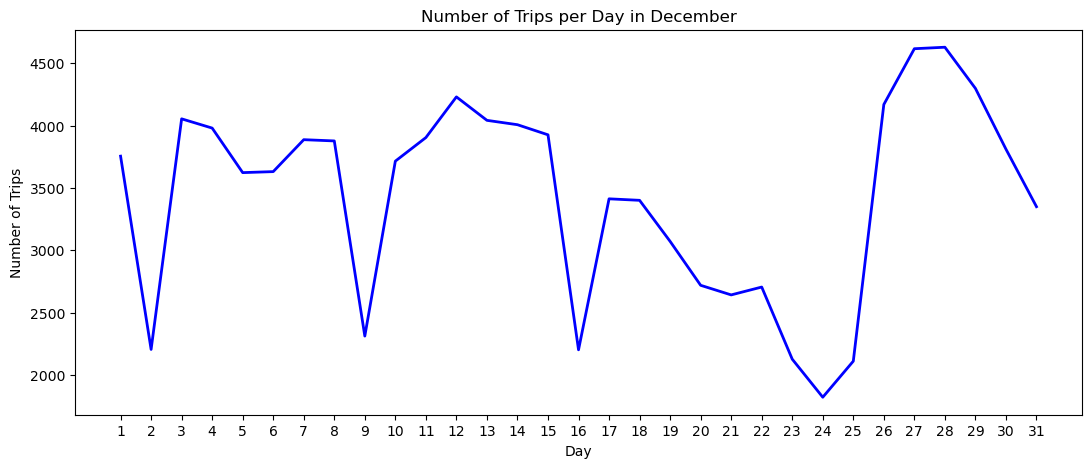

In [90]:
lga_df=full_lyft_df.loc[full_lyft_df['PULocationID'].isin([138])]

lga_df["DOLocationID"].groupby(lga_df.index.day).count().plot(figsize=(13, 5), color="blue", linewidth=2)

plt.title("Number of Trips per Day in December")
plt.xlabel("Day")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Number of Trips")
plt.show()

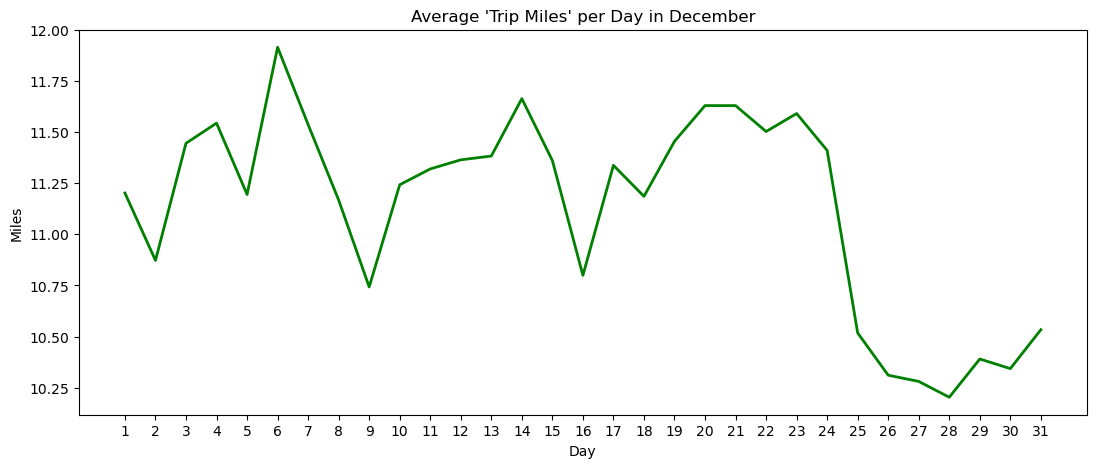

In [31]:
lga_df.groupby(lga_df.index.day)["trip_miles"].mean().plot(figsize=(13, 5), color="green", linewidth=2)
plt.title("Average 'Trip Miles' per Day in December")
plt.xlabel("Day")
plt.ylabel("Miles")
plt.xticks(np.arange(1, 32, 1))
plt.show()

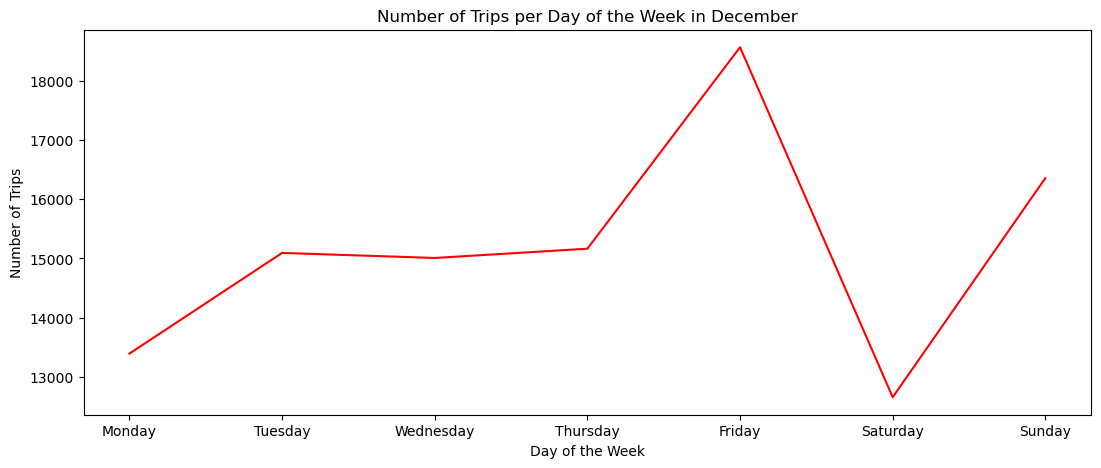

In [32]:
lga_df.groupby(lga_df.index.dayofweek)["trip_time"].count().plot(figsize=(13, 5), color="red")
plt.title("Number of Trips per Day of the Week in December")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

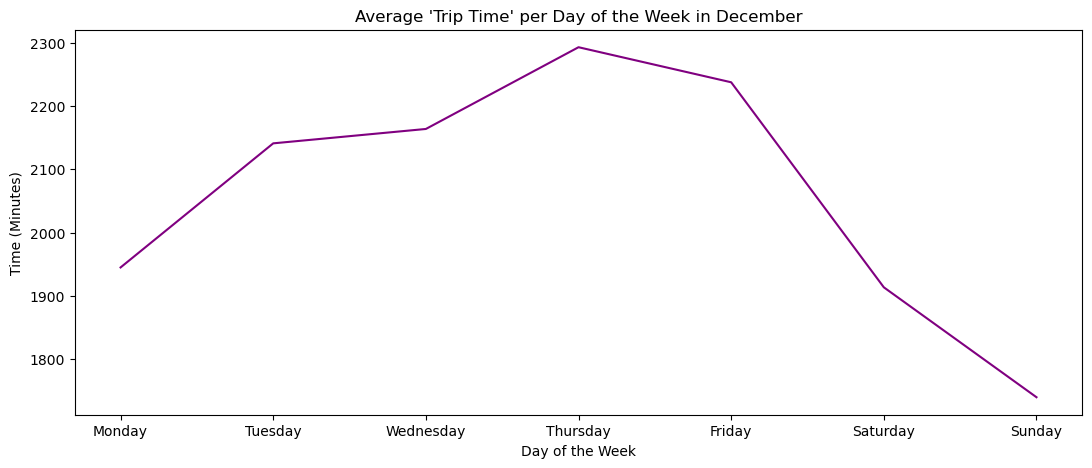

In [33]:
lga_df.groupby(lga_df.index.dayofweek)["trip_time"].mean().plot(figsize=(13, 5), color="purple")
plt.title("Average 'Trip Time' per Day of the Week in December")
plt.xlabel("Day of the Week")
plt.ylabel("Time (Minutes)")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

Text(0, 0.5, 'Miles')

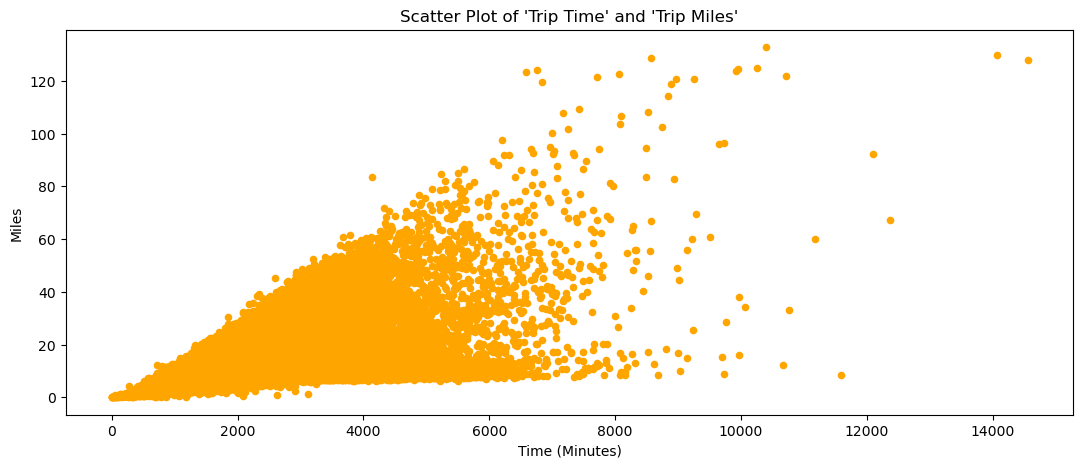

In [34]:
# scatter plot for trip time and trip miles
lga_df.plot.scatter(x="trip_time", y="trip_miles", figsize=(13, 5), color="orange") 
plt.title("Scatter Plot of 'Trip Time' and 'Trip Miles'")
plt.xlabel("Time (Minutes)")
plt.ylabel("Miles")


In [35]:
# Read the taxi_zone_lookup.csv file into a DataFrame.
Taxi_Zone_Lookup_df = pd.read_csv("taxi_zone_lookup.csv")

# Display the first 10 rows of the DataFrame.
Taxi_Zone_Lookup_df.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [36]:
# merge the two dataframes based on pickup locations
full_lga_locations_df = pd.merge(lga_df, Taxi_Zone_Lookup_df, left_on="PULocationID", right_on="LocationID")
full_lga_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,LocationID,Borough,Zone,service_zone
0,2023-12-01 00:00:09,2023-12-01 00:19:03,138,36,8.452,1134,35.21,0.00,0.98,3.16,0.00,2.5,0.00,21.93,41.85,138,Queens,LaGuardia Airport,Airports
1,2023-12-01 00:00:13,2023-12-01 00:24:10,138,211,9.522,1437,33.11,0.25,0.99,3.18,2.75,2.5,8.56,26.22,51.34,138,Queens,LaGuardia Airport,Airports
2,2023-12-01 00:00:20,2023-12-01 00:18:10,138,170,7.998,1070,29.91,5.97,1.06,3.41,2.75,2.5,6.84,20.72,52.44,138,Queens,LaGuardia Airport,Airports
3,2023-12-01 00:00:21,2023-12-01 00:11:13,138,260,3.666,652,18.17,0.00,0.57,1.83,0.00,2.5,0.00,11.03,23.07,138,Queens,LaGuardia Airport,Airports
4,2023-12-01 00:00:28,2023-12-01 00:42:04,138,265,29.463,2496,82.76,0.00,2.34,7.57,0.00,2.5,22.00,67.36,117.17,138,Queens,LaGuardia Airport,Airports


In [38]:
# Rename the columns to match the schema
full_lga_locations_df.rename(columns={"Borough": "Pickup_Borough", "Zone": "Pickup_Zone"}, inplace=True)

# Drop the LocationID and service_zone columns
full_lga_locations_df = full_lga_locations_df.drop(columns=["LocationID", "service_zone"])

# Reorder the columns
full_lga_locations_df = full_lga_locations_df[["pickup_datetime", "dropoff_datetime", "PULocationID", "Pickup_Borough", "Pickup_Zone", "DOLocationID", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "Total_Passenger_Cost"]]

# Display the first 5 rows of the DataFrame.
full_lga_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:09,2023-12-01 00:19:03,138,Queens,LaGuardia Airport,36,8.452,1134,35.21,0.00,0.98,3.16,0.00,2.5,0.00,21.93,41.85
1,2023-12-01 00:00:13,2023-12-01 00:24:10,138,Queens,LaGuardia Airport,211,9.522,1437,33.11,0.25,0.99,3.18,2.75,2.5,8.56,26.22,51.34
2,2023-12-01 00:00:20,2023-12-01 00:18:10,138,Queens,LaGuardia Airport,170,7.998,1070,29.91,5.97,1.06,3.41,2.75,2.5,6.84,20.72,52.44
3,2023-12-01 00:00:21,2023-12-01 00:11:13,138,Queens,LaGuardia Airport,260,3.666,652,18.17,0.00,0.57,1.83,0.00,2.5,0.00,11.03,23.07
4,2023-12-01 00:00:28,2023-12-01 00:42:04,138,Queens,LaGuardia Airport,265,29.463,2496,82.76,0.00,2.34,7.57,0.00,2.5,22.00,67.36,117.17


In [39]:
# merge  lyft_PU_locations_df with Taxi_Zone_Lookup_df based on drop-off locations
full_lga_locations_df = pd.merge(full_lga_locations_df, Taxi_Zone_Lookup_df, left_on="DOLocationID", right_on="LocationID")
full_lga_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,LocationID,Borough,Zone,service_zone
0,2023-12-01 00:00:09,2023-12-01 00:19:03,138,Queens,LaGuardia Airport,36,8.452,1134,35.21,0.00,...,3.16,0.00,2.5,0.00,21.93,41.85,36,Brooklyn,Bushwick North,Boro Zone
1,2023-12-01 00:00:13,2023-12-01 00:24:10,138,Queens,LaGuardia Airport,211,9.522,1437,33.11,0.25,...,3.18,2.75,2.5,8.56,26.22,51.34,211,Manhattan,SoHo,Yellow Zone
2,2023-12-01 00:00:20,2023-12-01 00:18:10,138,Queens,LaGuardia Airport,170,7.998,1070,29.91,5.97,...,3.41,2.75,2.5,6.84,20.72,52.44,170,Manhattan,Murray Hill,Yellow Zone
3,2023-12-01 00:00:21,2023-12-01 00:11:13,138,Queens,LaGuardia Airport,260,3.666,652,18.17,0.00,...,1.83,0.00,2.5,0.00,11.03,23.07,260,Queens,Woodside,Boro Zone
4,2023-12-01 00:00:28,2023-12-01 00:42:04,138,Queens,LaGuardia Airport,265,29.463,2496,82.76,0.00,...,7.57,0.00,2.5,22.00,67.36,117.17,265,NaN,Outside of NYC,NaN


In [40]:
# Rename the columns to match the schema
full_lga_locations_df.rename(columns={"Borough": "Dropoff_Borough", "Zone": "Dropoff_Zone"}, inplace=True)

# Drop the LocationID and service_zone columns
full_lga_locations_df = full_lga_locations_df.drop(columns=["LocationID", "service_zone"])

# Reorder the columns
full_lga_locations_df = full_lga_locations_df[["pickup_datetime", "dropoff_datetime", "PULocationID", "Pickup_Borough", "Pickup_Zone", "DOLocationID", "Dropoff_Borough", "Dropoff_Zone", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips", "driver_pay", "Total_Passenger_Cost"]]

# Display the first 5 rows of the DataFrame.
full_lga_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:09,2023-12-01 00:19:03,138,Queens,LaGuardia Airport,36,Brooklyn,Bushwick North,8.452,1134,35.21,0.00,0.98,3.16,0.00,2.5,0.00,21.93,41.85
1,2023-12-01 00:00:13,2023-12-01 00:24:10,138,Queens,LaGuardia Airport,211,Manhattan,SoHo,9.522,1437,33.11,0.25,0.99,3.18,2.75,2.5,8.56,26.22,51.34
2,2023-12-01 00:00:20,2023-12-01 00:18:10,138,Queens,LaGuardia Airport,170,Manhattan,Murray Hill,7.998,1070,29.91,5.97,1.06,3.41,2.75,2.5,6.84,20.72,52.44
3,2023-12-01 00:00:21,2023-12-01 00:11:13,138,Queens,LaGuardia Airport,260,Queens,Woodside,3.666,652,18.17,0.00,0.57,1.83,0.00,2.5,0.00,11.03,23.07
4,2023-12-01 00:00:28,2023-12-01 00:42:04,138,Queens,LaGuardia Airport,265,NaN,Outside of NYC,29.463,2496,82.76,0.00,2.34,7.57,0.00,2.5,22.00,67.36,117.17


Text(0, 0.5, 'Number of Trips')

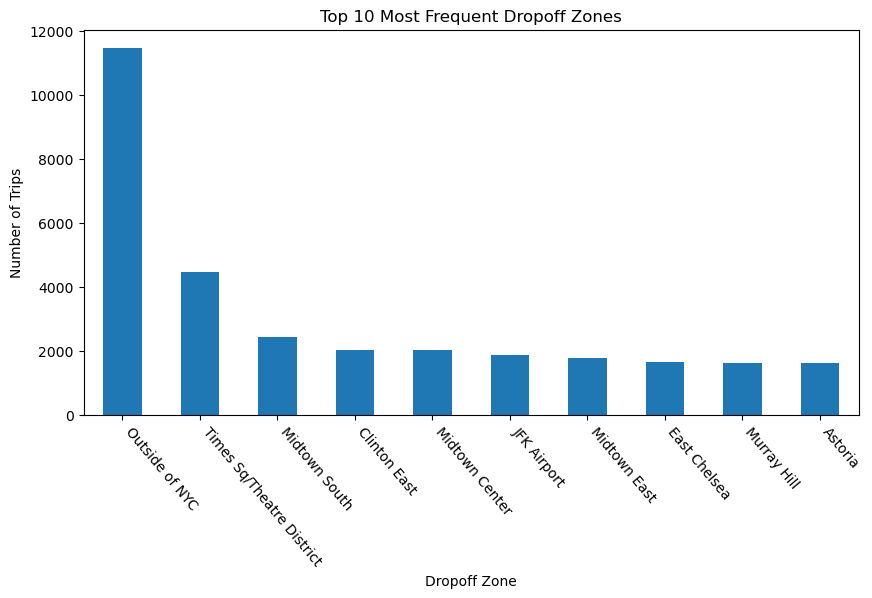

In [44]:
# Plot the top 10 most frequent pickup zones.
full_lga_locations_df["Dropoff_Zone"].value_counts().head(10).plot(kind="bar", title="Top 10 Most Frequent Dropoff Zones", figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")

Text(0.5, 0, 'Cost ($)')

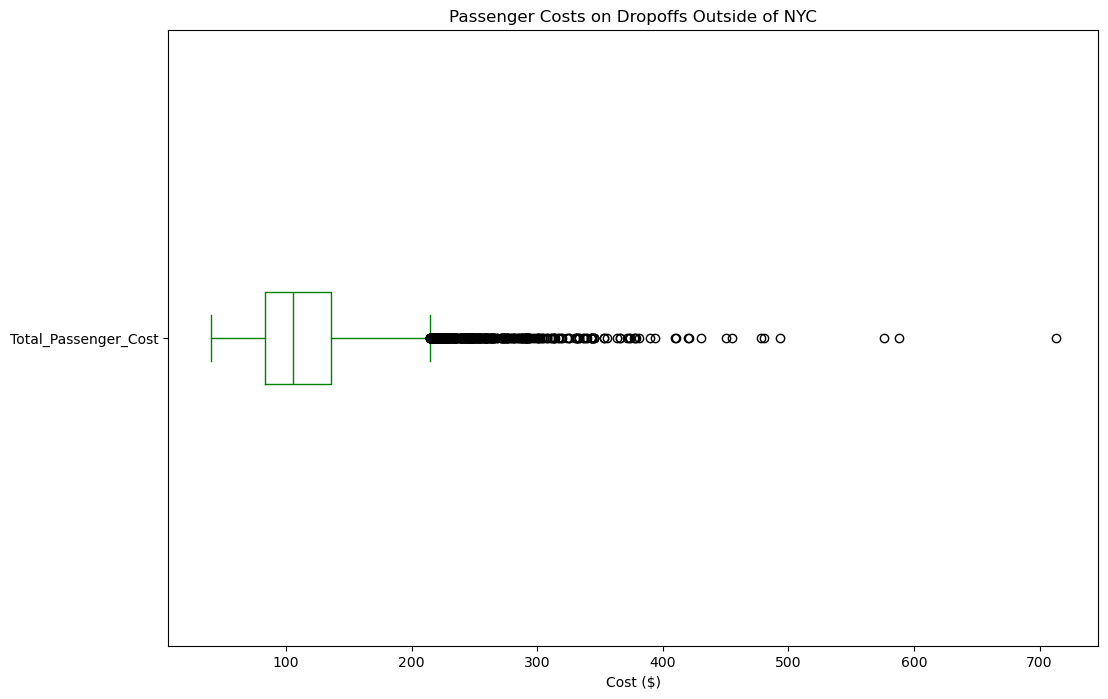

In [92]:
# Boxplot for passenger costs on dropoffs outside of NYC
full_lga_locations_df[full_lga_locations_df["Dropoff_Zone"] == "Outside of NYC"]["Total_Passenger_Cost"].plot(kind="box", figsize=(12, 8), color="green",vert=False)   
plt.title("Passenger Costs on Dropoffs Outside of NYC")
plt.ylabel(None)
plt.xlabel("Cost ($)")

In [43]:
borough_dropoff_costs = full_lga_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["Total_Passenger_Cost"]].sum()
borough_dropoff_costs = borough_dropoff_costs.sort_values(by="Total_Passenger_Cost", ascending=False)
borough_dropoff_costs.head(15)

Total_Passenger_Cost
Dropoff_Borough Dropoff_Zone                                      
Manhattan       Times Sq/Theatre District                363663.44
                Midtown South                            170503.13
                Clinton East                             156557.83
                Midtown Center                           153966.46
                Midtown East                             123481.55
                East Chelsea                             123372.01
                Midtown North                            120007.29
Queens          JFK Airport                              109721.60
Manhattan       Murray Hill                              102313.99
                Garment District                          98284.96
                Financial District North                  93504.83
                Penn Station/Madison Sq West              84442.60
                East Village                              82847.89
Brooklyn        Park Slope                                81513.23
Manhattan       Flatiron                                  79561.99

In [52]:
base_borough_dropoff_costs = full_lga_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["base_passenger_fare"]].sum()
base_borough_dropoff_costs = base_borough_dropoff_costs.sort_values(by="base_passenger_fare", ascending=False)
base_borough_dropoff_costs.head(15)

base_passenger_fare
Dropoff_Borough Dropoff_Zone                                     
Manhattan       Times Sq/Theatre District               251929.21
                Midtown South                           113477.24
                Clinton East                            108826.16
                Midtown Center                          106919.49
                Midtown North                            84922.93
Queens          JFK Airport                              84830.97
Manhattan       East Chelsea                             84094.11
                Midtown East                             84016.67
                Murray Hill                              67604.83
                Financial District North                 67353.91
                Garment District                         66276.41
Brooklyn        Park Slope                               64487.82
Manhattan       East Village                             59836.31
                Penn Station/Madison Sq West             56799.81
                Flatiron                                 54520.19

Text(0, 0.5, 'Average Tip $')

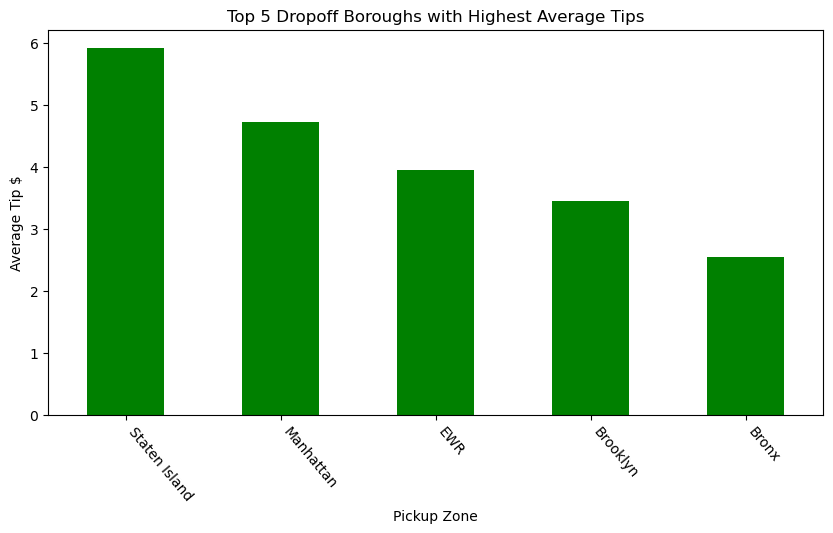

In [51]:
# Plot the top 5 highest average tip pickup borough.
full_lga_locations_df.groupby(["Dropoff_Borough"])["tips"].mean().sort_values(ascending=False).head(5).plot(kind="bar", title="Top 5 Dropoff Boroughs with Highest Average Tips", figsize=(10, 5), color="green")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Tip $")


Text(0, 0.5, 'Average Driver Pay')

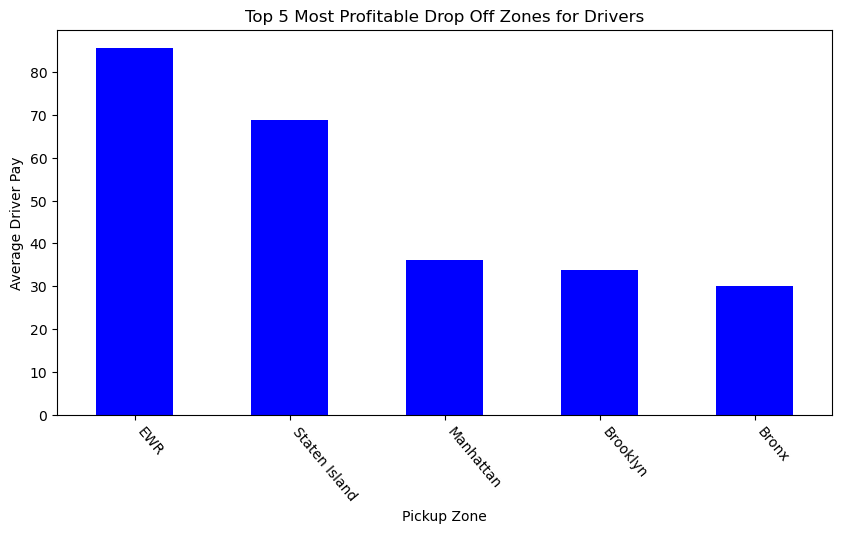

In [93]:
# Plot the top 5 most profitable pickup zones for drivers.
full_lga_locations_df.groupby(["Dropoff_Borough"])["driver_pay"].mean().sort_values(ascending=False).head(5).plot(kind="bar", title="Top 5 Most Profitable Drop Off Zones for Drivers", figsize=(10, 5), color="blue")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Driver Pay")

In [49]:
# plot the most efficient trips (cost per mile)
full_lga_locations_df["Cost_Per_Mile"] = full_lga_locations_df["Total_Passenger_Cost"] / full_lga_locations_df["trip_miles"]
efficient_lyfts_df = full_lga_locations_df.loc[full_lga_locations_df["Cost_Per_Mile"]>0].sort_values(by="Cost_Per_Mile", ascending=True)
efficient_lyfts_df.head(10)

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost,Cost_Per_Mile
85733,2023-12-27 00:26:13,2023-12-27 01:03:21,138,Queens,LaGuardia Airport,14,Brooklyn,Bay Ridge,26.665,2228,46.11,0.76,1.28,4.14,0.0,2.5,0.0,56.36,54.79,2.054753
82059,2023-12-26 10:16:16,2023-12-26 10:55:37,138,Queens,LaGuardia Airport,132,Queens,JFK Airport,24.076,2361,41.36,0.00,1.27,4.11,0.0,5.0,0.0,57.96,51.74,2.149028
63289,2023-12-18 19:58:40,2023-12-18 20:38:19,138,Queens,LaGuardia Airport,132,Queens,JFK Airport,23.344,2379,40.47,0.00,1.25,4.04,0.0,5.0,0.0,53.41,50.76,2.174435
84896,2023-12-26 21:46:23,2023-12-26 22:23:40,138,Queens,LaGuardia Airport,265,NaN,Outside of NYC,30.423,2237,41.18,21.29,1.70,0.00,0.0,2.5,0.0,67.58,66.67,2.191434
78972,2023-12-24 20:50:36,2023-12-24 22:11:01,138,Queens,LaGuardia Airport,265,NaN,Outside of NYC,55.500,4825,107.97,8.00,3.26,0.00,0.0,2.5,0.0,129.11,121.73,2.193333
72673,2023-12-22 00:50:03,2023-12-22 01:18:10,138,Queens,LaGuardia Airport,132,Queens,JFK Airport,20.288,1687,35.30,0.00,1.11,3.58,0.0,5.0,0.0,42.81,44.99,2.217567
28980,2023-12-08 23:54:04,2023-12-09 00:18:56,138,Queens,LaGuardia Airport,132,Queens,JFK Airport,20.042,1492,35.05,0.00,1.10,3.55,0.0,5.0,0.0,40.63,44.70,2.230316
6231,2023-12-03 09:56:19,2023-12-03 11:03:13,138,Queens,LaGuardia Airport,265,NaN,Outside of NYC,38.928,4014,74.24,7.92,2.33,0.00,0.0,2.5,0.0,111.52,86.99,2.234638
55320,2023-12-16 08:11:39,2023-12-16 08:58:56,138,Queens,LaGuardia Airport,91,Brooklyn,Flatlands,28.495,2837,54.90,0.00,1.49,4.81,0.0,2.5,0.0,64.57,63.70,2.235480
9932,2023-12-03 23:40:48,2023-12-04 00:14:08,138,Queens,LaGuardia Airport,231,Manhattan,TriBeCa/Civic Center,15.096,2000,33.33,0.69,0.00,0.00,0.0,0.0,0.0,38.92,34.02,2.253577


In [55]:
lga_mean_values = lga_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].mean()
lga_mean_values.round(2)


trip_miles                11.11
trip_time               2069.15
base_passenger_fare       47.20
tolls                      3.81
tips                       4.28
driver_pay                36.40
Total_Passenger_Cost      64.58
dtype: float64

In [56]:
lga_median_values = lga_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].median()
lga_median_values.round(2)

trip_miles                 9.54
trip_time               1856.00
base_passenger_fare       42.90
tolls                      3.67
tips                       0.00
driver_pay                32.78
Total_Passenger_Cost      59.65
dtype: float64

In [58]:
lga_mean_values/lga_median_values

trip_miles              1.165081
trip_time               1.114843
base_passenger_fare     1.100273
tolls                   1.037588
tips                         inf
driver_pay              1.110513
Total_Passenger_Cost    1.082650
dtype: float64

In [71]:
positive_lga_df=lga_df.loc[lga_df[ 'base_passenger_fare']>=0]

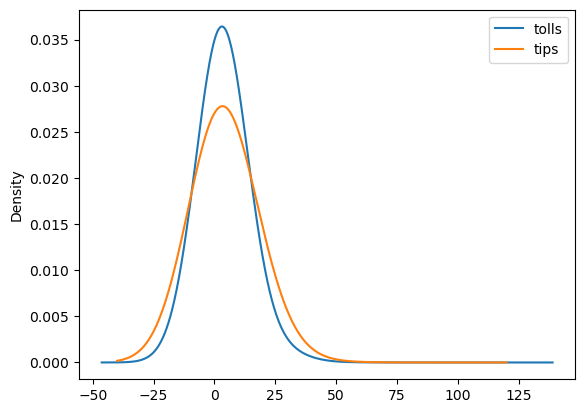

In [96]:
lga_mean_base_fare=positive_lga_df[['tolls','tips']]
s =lga_mean_base_fare.plot.kde(bw_method=2)

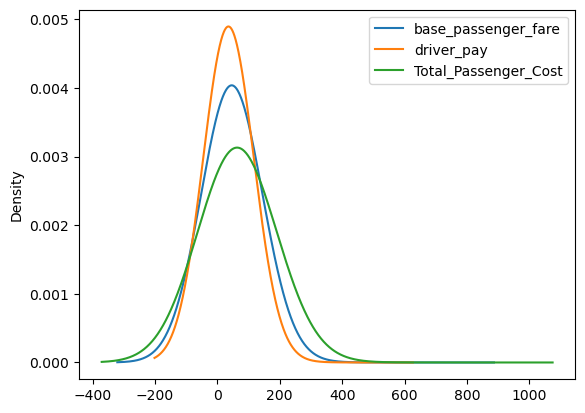

In [94]:
lga_mean_base_fare2 = lga_df[['base_passenger_fare','driver_pay','Total_Passenger_Cost']]
s=lga_mean_base_fare2.plot.kde(bw_method=4)